<a href="https://colab.research.google.com/github/EmoreiraV/RUoG/blob/main/Week7_Live_Session_Solutions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Week 7 Live Session

We now move on to the second half of the course, looking a bit closer at some classical programming concepts before moving on to some advanced features of R and RStudio.

In week 7, we will look at control structures, and how to create these within R. Specifically we will look at:

- Logical switches: `if` statements
- Loops. We will look at `for` loops, nested loops, the `break` and `next` statements and `while` loops.
- The `ifelse` function
- When best to avoid loops


# `if` statements

`if` statements in R allow us to carry out operations based on certain circumstances. You can almost view these as Yes/No questions.

For an operation to be carried out, a certain condition must be met. This expression is a logical expression, with either a `TRUE/FALSE` response.

We can use multiple logical expressions can be used for our conditions.

In [ ]:
if (condition) {
    statement11
    ...
    statement1a
} else {
    statement21
    ...
    statement2b
}

In [ ]:
x <- rnorm(1)

if(x >0){
  y <- x^2
}else{
  y <- 0
}

x
y

[1] -0.1944522

[1] 0

# Loops

Loops provide a way of carrying out repetitive calculations in a more efficient manner.

The `for` loop will carry out the operations in the loop once for every element of a defined sequence (which we set at the beginning of the loop)

In [ ]:
for (variable in sequence) {
    statement1
    ...
    statementn
}

In [ ]:
x <- rnorm(10)
x
for(i in 1:length(x)){
  if(x[i]>0){
    x[i] <- x[i]^2
  }else{
    x[i] <- 0
  }
}

x

[1] -0.25137326  0.72649805  1.54159310  0.03620893 -1.01388069  0.83498975
 [7]  0.94340881 -0.55223288  0.16906843  0.80813415

[1] 0.000000000 0.527799410 2.376509277 0.001311087 0.000000000 0.697207885
 [7] 0.890020181 0.000000000 0.028584135 0.653080802

We can nest loops within one another. Do note though, you will have to use different names for the loop variables in a nested loop.

In [ ]:
for(i in 1:5)
  for(j in 1:3)
  print(c(i,j))

[1] 1 1
[1] 1 2
[1] 1 3
[1] 2 1
[1] 2 2
[1] 2 3
[1] 3 1
[1] 3 2
[1] 3 3
[1] 4 1
[1] 4 2
[1] 4 3
[1] 5 1
[1] 5 2
[1] 5 3


# Additional loop operations

Loops will run for a fixed number of times. The `break` statement allows us to stop a loop once a certain condition has been met.

In [ ]:
x <- 1
for (i in 1:10)
    x <- x/2 + 1/x

x <- 1
for (i in 1:100) {
    x.old <- x                             # Store the old value of x
    x <- x/2 + 1/x                         # Update x
    if (abs(x-x.old)<1e-8)                 # Check for convergence
        break
}

The `next` statement allows us to stop the processing of our current iteration if a certain condition is met. This will then return to the main body of the loop.

In nested loops, `break` and `next` only affect the inner most loop.

In [ ]:
for (x in 1:10) {
    if (x%%2==0)
        next
    print(x)
}

For some loops, we do not know how many times we need to repeatedly perform operations. The `while` loop allows us to perform operations until a criteria has been met.

In [ ]:
while (condition) {
    statement1
    ...
    statementn
}

In [ ]:
x <- 1
x.old <- 0
while(abs(x-x.old)>1e-8) {
    x.old <- x                             # Store the old value of x
    x <- x/2 + 1/x                         # Update x
}
x

# The `ifelse` function

When we want to use a vector of conditions (i.e. more than one condition), we need to use a loop that will go through the vector by each element. The `ifelse` function is an efficient way of doing this.

For `result <- ifelse(condition, yes, no)`, the function will set the $i^{th}$ element of a result to be yes if the $i^{th}$ element of condition is `TRUE`, otherwise it will be set to no.  

In [ ]:
n <- 5
x <- sample(n)
y <- sample(n)

z <- numeric(n)                  # Create vector to hold result
for (i in 1:n) {
  if (x[i]>y[i]) {               # If x[i] is larger ...
    z[i] <- x[i]                 # ... set z[i] to  x[i]
  } else {                       # Otherwise (i.e. if x[i] is not larger) ...
    z[i] <- y[i]                 # ... set z[i] to  y[i]
  }
}

z <- ifelse(x>y, x, y)

# Avoiding loops

As good as R can be for lots of tasks, it is notoriously slow at processing loops! Therefore, it is best to avoid loops for large tasks where possible.

The best way to avoid loops for most tasks in R is to exploit the vectorised nature of items and operations as much as possible within R.

# Week 7 Live Session Task

Simulate and plot ten points from $\mathbb{R}^2$ using

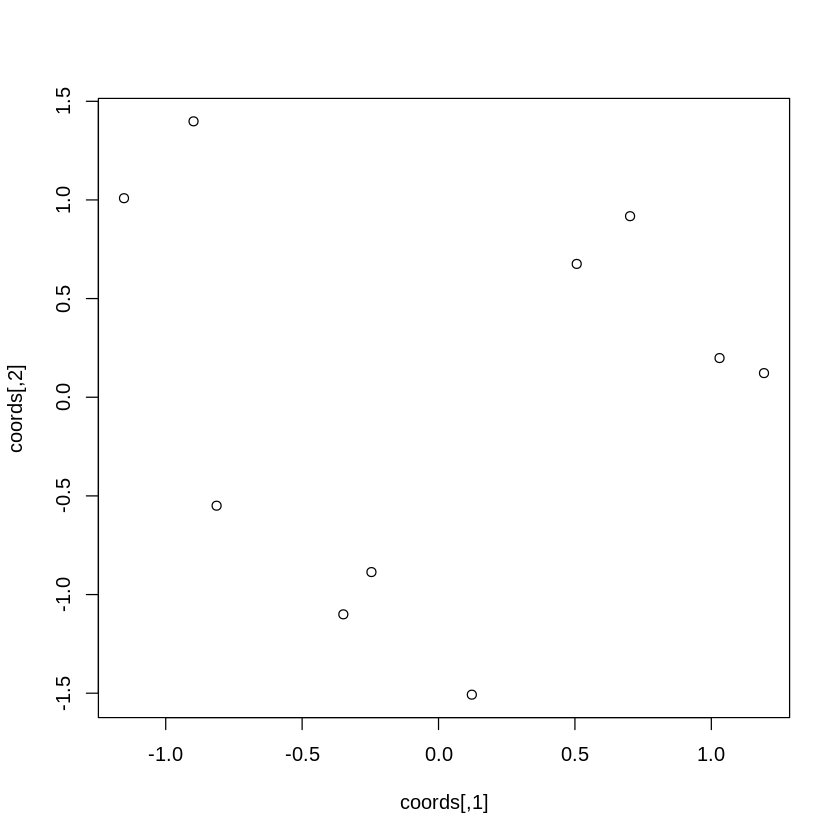

In [ ]:
n<-10
coords<-matrix(rnorm(2*n),ncol=2)
plot(coords)



*   Connect all pairs of points using blue lines. Your plot should look like the one shown in the handout
*   Connect the two closest points with a thick red line. Your code should find the two closest points automatically.



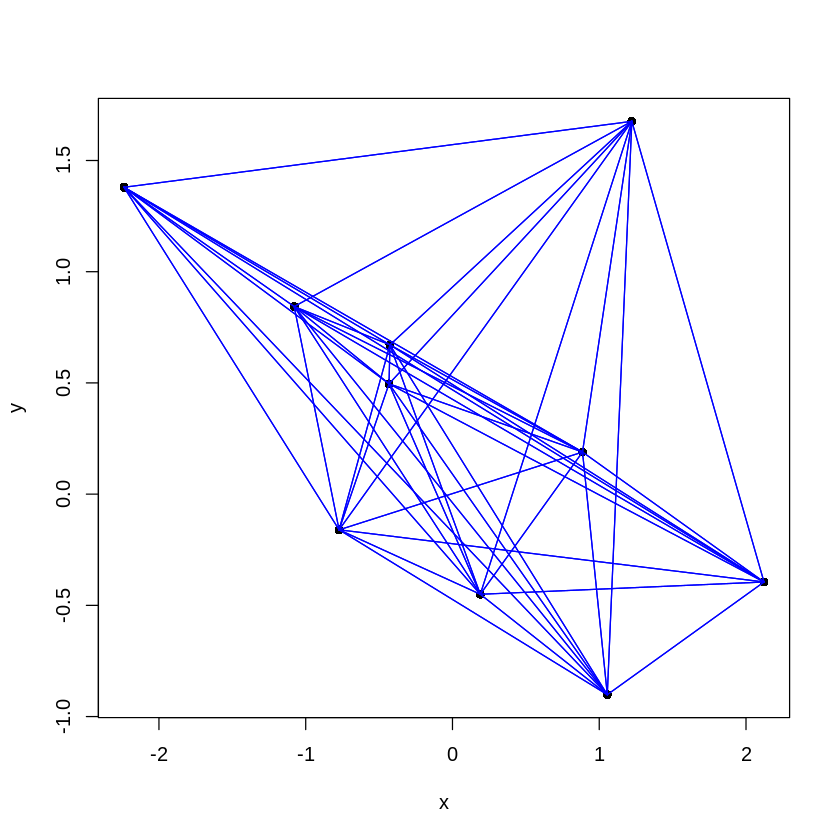

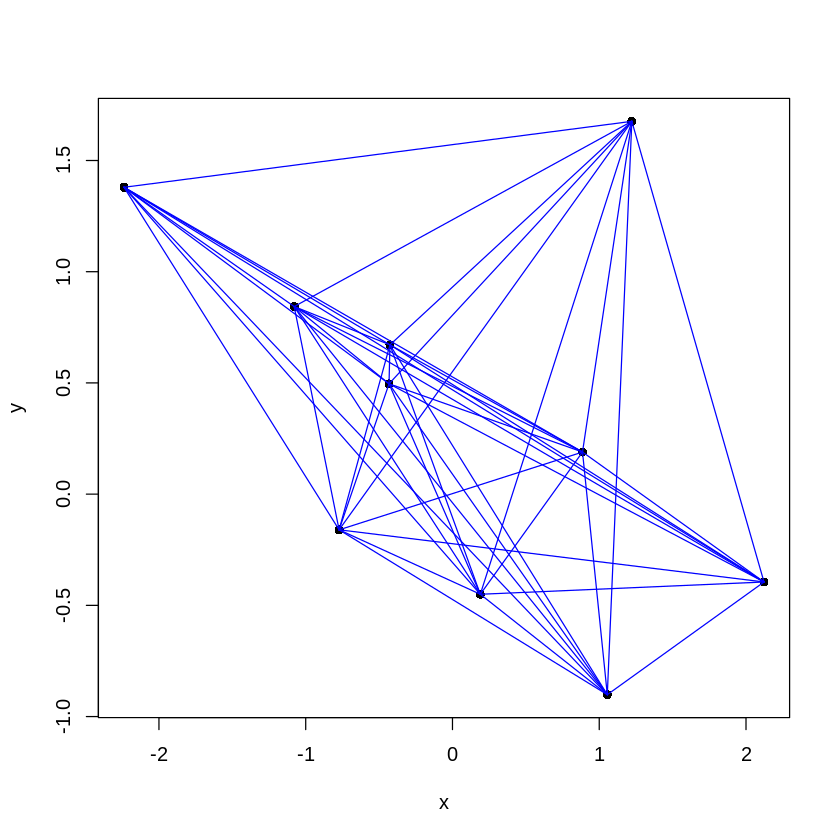

In [ ]:
n<-10
coords<-matrix(rnorm(2*n),ncol=2)
plot(coords,pch=16,xlab="x",ylab="y")

for(i in 1:n)   {
  for(j in 1:n) {
    lines(coords[c(i,j),],col="blue")
  }
}

plot(coords,pch=16,xlab="x",ylab="y")
for(i in 1:(n-1)) {
  for(j in (i+1):n) {
    lines(coords[c(i,j),],col="blue")
  }
}

In [ ]:
closest.pair <- c(NA,NA)
closest.distance <- Inf

for(i in 1:(n-1))   {
  for(j in (i+1):n) {
    dist <- sum((coords[i,]-coords[j,])^2)
    if(dist<closest.distance) {
      closest.pair <- c(i,j)
      closest.distance <- dist
    }
  }
}

closest.pair
closest.distance

[1] 1 6

[1] 0.03070161

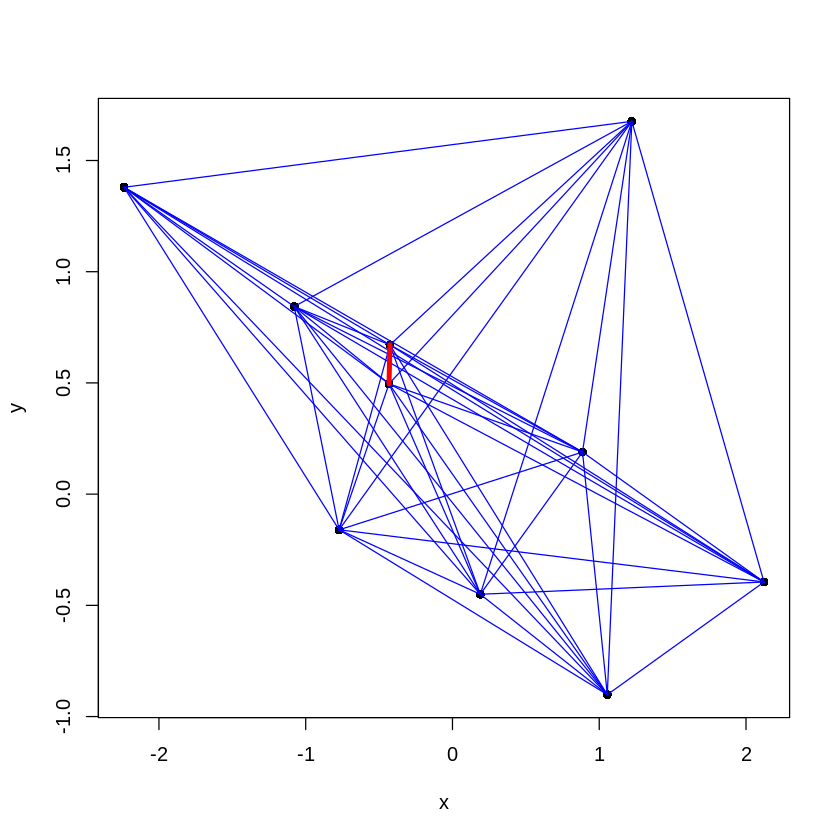

In [ ]:
plot(coords,pch=16,xlab="x",ylab="y")
for(i in 1:(n-1)) {
  for(j in (i+1):n) {
    lines(coords[c(i,j),],col="blue")
  }
}
lines(coords[closest.pair,],col="red",lwd=4)